<a href="https://colab.research.google.com/github/pbpthinh/nlp-sentiment/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyvi

In [ ]:
import os, string, re
import glob
import pandas as pd
from pyvi import ViTokenizer, ViPosTagger
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

data_path ='/content/gdrive/My Drive/SA/Dataset/tiki_data.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

def tokenizer(text):
    token = ViTokenizer.tokenize(text)
    return token

def clean_doc(doc):
    for punc in string.punctuation:
        doc = doc.replace(punc,' '+ punc + ' ')
    doc = tokenizer(doc)
    doc = doc.lower()
    doc = re.sub(r"\?", " \? ", doc)
    doc = re.sub(r"[0-9]+", " num ", doc)
    for punc in string.punctuation:
        if punc !="_":
            doc = doc.replace(punc,' ')
    doc = re.sub('\\s+',' ',doc)
    return doc

In [ ]:
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,ttn_gia,ttn_bl_diem,ttn_bl_noi_dung,ttn_thuong_hieu
0,0,45.000,5,chất lượng sản phẩm tuyệt vời,No Brand
1,1,255.000,4,"chất lượng sản phẩm tuyệt vời, chất lượng sản ...",No Brand
2,2,105.000,5,chất lượng sản phẩm tuyệt vời đóng gói sản phẩ...,No Brand
3,3,180.000,5,"giày đẹp lắm :red_heart: , thời gian giao hàng...",No Brand
4,4,34.000,4,hsd tới 251 y chang chị mây tư vấn chĩ mây dễ ...,Lotte


   ttn_bl_diem
5         4823
4         4546
3          540
1           89
2           68


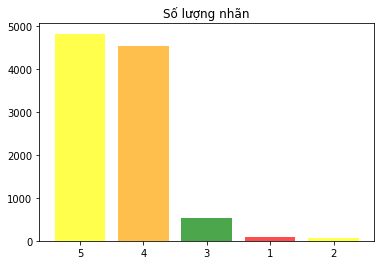

In [ ]:

statics = df["ttn_bl_diem"].value_counts().to_frame()
print(statics)

labels = statics.index.tolist()
counts = statics["ttn_bl_diem"].tolist()
plt.figure()
plt.bar(range(len(counts)), counts, color = ['yellow', 'orange', 'green', 'red', 'yellow'], alpha = .7)
plt.xticks(range(len(counts)), labels, rotation = 0)
plt.title('Số lượng nhãn')
plt.show()

In [ ]:
X_data = df["ttn_bl_noi_dung"]
y_data = df["ttn_bl_diem"]
print(len(X_data),len(y_data))

10066 10066


In [ ]:
s = X_data[0]
print(clean_doc(s))

chất_lượng sản_phẩm tuyệt_vời


In [ ]:
X_data_proceed = []
y_data_encoded = []
for index,data in enumerate(X_data):
    X_data_proceed.append(clean_doc(data))
    y_data_encoded.append(int(y_data[index]))

# Hiển thị ví dụ
print(X_data_proceed[0])
print(y_data_encoded[0])

chất_lượng sản_phẩm tuyệt_vời
5


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1),use_idf=True, smooth_idf=True)

X_data_tfidf = vectorizer.fit_transform(X_data_proceed)

print("Tổng số từ vựng khi đánh chỉ số TF-IDF")
print(vectorizer.get_feature_names())

print("Kích thước của vector dựa trên biểu diễn TF-IDF: ", X_data_tfidf.shape)

Tổng số từ vựng khi đánh chỉ số TF-IDF
['ad', 'adidas', 'ae', 'ah', 'ahihi', 'ai', 'ai_ngờ', 'ai_đời', 'ak', 'alo', 'am', 'am_hiểu', 'an', 'an_k', 'an_toàn', 'an_tâm', 'and', 'android', 'anger', 'angry', 'anguished', 'anh', 'anh_chị', 'anh_chị_em', 'anh_em', 'anh_trai', 'anw', 'anxious', 'ao', 'ap', 'auth', 'auto', 'aw', 'aó', 'ba', 'ba_lô', 'backhand', 'bagy', 'bai', 'balloon', 'balo', 'ban', 'ban_công', 'ban_ung', 'ban_đầu', 'bang', 'banh', 'bao', 'bao_bì', 'bao_bọc', 'bao_bố', 'bao_giờ', 'bao_gói', 'bao_gồm', 'bao_lâu', 'bao_nhiêu', 'bao_tay', 'bao_tải', 'bas', 'base', 'basic', 'bat', 'bay', 'bay_hơi', 'be', 'be_bé', 'beaming', 'beating', 'ben', 'best', 'bgio', 'bh', 'bi', 'bia', 'bich', 'biet', 'big', 'bigsize', 'bik', 'bikini', 'bil', 'bin', 'binh', 'bit', 'biêt', 'biến_dạng', 'biến_hoá', 'biết', 'biết_bao_nhiêu', 'biết_mấy', 'biển', 'biệt', 'biệt_tăm', 'bj', 'bjk', 'bjo', 'black', 'blossom', 'blowing', 'blue', 'bluetoth', 'bn', 'bo', 'bo_bo', 'body', 'bok', 'bon', 'bon_chen', 'bo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_tfidf, np.array(y_data_encoded), test_size=0.3, random_state=42)

print("Hiển thị số lượng trong tập train và tập test")
print(X_train.shape)
print(X_test.shape)
# Số lượng train là 8052 mẫu, test là 2014 

Hiển thị số lượng trong tập train và tập test
(7046, 5787)
(3020, 5787)


In [ ]:
from sklearn import svm

classifier = svm.LinearSVC(multi_class="crammer_singer", C = 0.1,  penalty='l2', random_state= 42, verbose=1)
classifier.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=0.1, multi_class='crammer_singer', random_state=42, verbose=1)

In [ ]:
predicted = classifier.predict(X_test)
y_pred = []
for y in predicted:
    y_pred.append([int(y)])
    
print("Kết quả các độ đo trong mô hình SVM")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1 - score: ",f1_score(y_test, y_pred, average="weighted"))
print("Precision: ",precision_score(y_test, y_pred, average="weighted"))
print("Recall: ",recall_score(y_test, y_pred, average="weighted"))

Kết quả các độ đo trong mô hình SVM
Accuracy:  0.7605960264900662
F1 - score:  0.7356284535421822
Precision:  0.72614972396316
Recall:  0.7605960264900662


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.25      0.05      0.08        21
           2       0.00      0.00      0.00        15
           3       0.27      0.02      0.04       182
           4       0.74      0.77      0.76      1344
           5       0.78      0.86      0.82      1458

    accuracy                           0.76      3020
   macro avg       0.41      0.34      0.34      3020
weighted avg       0.73      0.76      0.74      3020



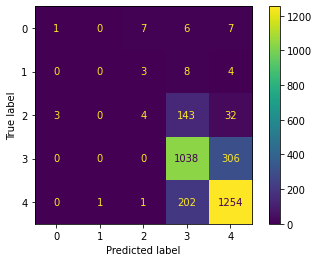

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import *

classifier =  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
classifier.fit(X_train, y_train)
print("Mô hình đã huấn luyện xong")

Mô hình đã huấn luyện xong


In [ ]:
predicted = classifier.predict(X_test)
y_pred = []
for y in predicted:
    y_pred.append([int(y)])
    
print("Kết quả các độ đo trong mô hình Naive Bayes")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1 - score: ",f1_score(y_test, y_pred, average="weighted"))
print("Precision: ",precision_score(y_test, y_pred, average="weighted"))
print("Recall: ",recall_score(y_test, y_pred, average="weighted"))

Kết quả các độ đo trong mô hình Naive Bayes
Accuracy:  0.6920529801324503
F1 - score:  0.667693165675782
Precision:  0.6487236946377146
Recall:  0.6920529801324503


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       182
           4       0.63      0.76      0.69      1344
           5       0.76      0.73      0.75      1458

    accuracy                           0.69      3020
   macro avg       0.28      0.30      0.29      3020
weighted avg       0.65      0.69      0.67      3020



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       182
           4       0.63      0.76      0.69      1344
           5       0.76      0.73      0.75      1458

    accuracy                           0.69      3020
   macro avg       0.28      0.30      0.29      3020
weighted avg       0.65      0.69      0.67      3020



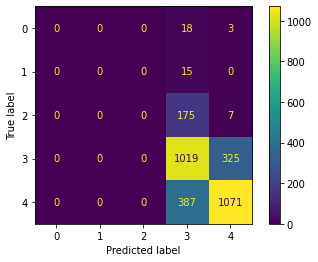

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
